### 1. Twitter String Quiz Solution
There are two ways to do this problem. If you want to return the url "https://twitter.com/search?q=oregon%20episcopal%20school&src=typd" if the user types in "oregon episcopal school", then you'll need to join "%20" between the words. You can use the join method:

In [2]:
search = input('what are you search terms? ')
words = search.split()
url = '%20'.join(words)
url = ''.join(['https://twitter.com/search?q=', url, '&src=typd'])
print(url)

what are you search terms? oregon episcopal school
https://twitter.com/search?q=oregon%20episcopal%20school&src=typd


If you didn't think to use the join command, then you could have also used a loop to add %20 between the words. However, you would get an extra "%20" at the end of the search terms that you didn't want. The counteract this, you would want to delete the last %20 after the loop using url[:-3].

In [4]:
search = input('what are you search terms? ')
words = search.split()
url = ''
for word in words:
    url = url + word + '%20'
url = 'https://twitter.com/search?q=' + url[:-3] + '&src=typd'
print(url)

what are you search terms? oregon episcopal school
https://twitter.com/search?q=oregon%20episcopal%20school&src=typd


### 2. Prime Quiz Solution
To find all of the primes between two numbers, you need to reset your assumption to prime = True each time you start the loop. (Remember, we need to assume prime is True instead of prime is False, since only one factor other than 1 and the number itself will make a number NOT prime, but there are plenty of numbers that don't evenly divide non-prime numbers (for example, 6 is not prime, even though it isn't divisible by 5.) Here's the solution:

In [6]:
lower = int(input('Give me a lower bound: '))
higher = int(input('Give me a higher bound: '))
for number in range(lower,higher+1):
    prime = True
    for i in range(2,number):
        if number % i == 0:
            prime = False
    if prime == True:
        print(number)

Give me a lower bound: 5
Give me a higher bound: 12
5
7
11


### 3. Cereal Box Simulation
Suppose there was a 20% chance of getting a Serena Williams card in a cereal box, a 30% chance of getting a Tiger Woods card, and a 50% chance of getting a Kobe Bryant card. How many boxes, on average, would you expect to have to purchase to get all three athletes? This is a perfect question to answer with simulation. The first way we will do this is to make a list of names and perform the simulation 1000 times:

In [3]:
import random as rand

names = ['S', 'S', 'T', 'T', 'T', 'K', 'K', 'K', 'K', 'K']

counts = []

for simulation in range(1000): #100 simulations
    count = 0 #you haven't bought any boxes yet
    Serena = False #you don't have any cards yet
    Tiger = False
    Kobe = False
    for boxes in range(1000000): #we dont know how many boxes we need so overestimate by A LOT
        name = rand.choice(names) #buy a box
        count = count + 1 #update your box count
        if name == 'S': #check what card you have
            Serena = True
        elif name == 'T':
            Tiger = True
        else:
            Kobe = True
        if Serena == True and Tiger == True and Kobe == True: #if you have all three, stop and count the number of boxes you bought
            counts.append(count)
            break
            
print(sum(counts)/len(counts)) #print the average box number

6.442


What if we wanted to plot this?

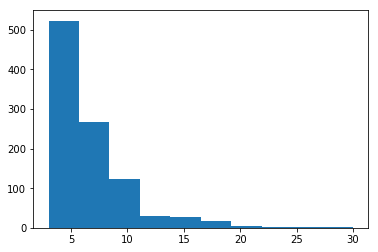

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(counts);

Let's clean this up...what are the min/max counts for the number of boxes? We'll make these the upper and lower parts of our range and make that number of rectangles. For example, if the boxcounts ranged between 3 and 7 boxes, then there would b 7-3 = 4 rectanges, separated by the integers 3, 4, 5, 6, and 7:

(array([ 194.,  182.,  147.,  109.,   94.,   63.,   53.,   45.,   26.,
          14.,   16.,   12.,   13.,    3.,    9.,    3.,    5.,    2.,
           3.,    2.,    0.,    1.,    2.,    0.,    0.,    1.,    1.]),
 array([  3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
         14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
         25.,  26.,  27.,  28.,  29.,  30.]),
 <a list of 27 Patch objects>)

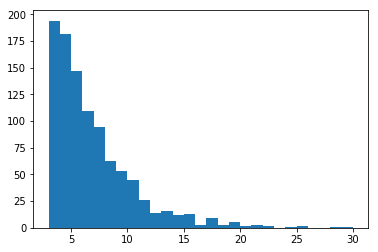

In [16]:
max_count = max(counts)
min_count = min(counts)
num_of_rect = max_count - min_count
plt.hist(counts, range = (min_count, max_count), bins = num_of_rect)

What if we wanted to make our axis labels tick marks more clear? We would need to tell matplotlib where to place the tick marks. If we wanted them in at every other integer value between the smallest and greatest count, we could type:

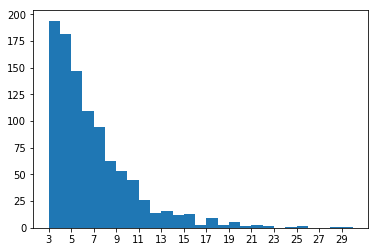

In [18]:
plt.hist(counts, range = (min_count, max_count), bins = num_of_rect)
plt.xticks(range(min_count, max_count, 2));

Once you are sampling from a set larger than 10 elements, you really won't want to write them all out by hand. Instead, you'll want to assign each a number and then randomly generate numbers. When the distributions are divisible by 10, we can assign numbers 0 through 9. For example, we'll assign Serena to 0 and 1, Tiger to 2,3, and 4, and Kobe to 5, 6, 7, 8, and 9:

In [2]:
import random as rand

counts = []

for simulation in range(1000): #100 simulations
    count = 0 #you haven't bought any boxes yet
    Serena = False #you don't have any cards yet
    Tiger = False
    Kobe = False
    for boxes in range(1000000): #we dont know how many boxes we need so overestimate by A LOT
        name = rand.randint(0,9) #buy a box
        count = count + 1 #update your box count
        if 0 <= name < 2: #check what card you have
            Serena = True
        elif 2 <= name < 5:
            Tiger = True
        else:
            Kobe = True
        if Serena == True and Tiger == True and Kobe == True: #if you have all three, stop and count the number of boxes you bought
            counts.append(count)
            break
            
print(sum(counts)/len(counts)) #print the average box number

6.722


If your percentages were not divisible by then, then you would need to assign numbers between 0 and 99. For example, if the Serena percentage was 25%, Tiger was 35%, and Kobe was 40%, then you would assign 0-24 to Serena, 25-59 to Tiger, and 60-99 to Kobe.

### 4. Expected Value
Expected value is given by the sum of the products of a value times the probability of that value occuring. Suppose we had a school raffle in which the prize amounts were below. What would the expected value be?

|  Prize (dollars) |Probability   |
|---   |---   |
|100 |0.15   | 
|200 | 0.05 |
|0 | 0.80 |

We would expect to win 100(0.15)+200(0.05)+0(0.80) = 25 dollars. How could we simulate this?

In [3]:
winnings = []
for i in range(10000):
    number = rand.randint(0,99)
    if 0 <= number < 15:
        winnings.append(100)
    elif 15 <= number < 20:
        winnings.append(200)
    else:
        winnings.append(0)
print(sum(winnings)/len(winnings))

24.6


### 5. More Plotting Histograms
Suppose we wanted to plot the number of times we won 0, 100, and 200 dollars in the above raffle. We could use the following code:

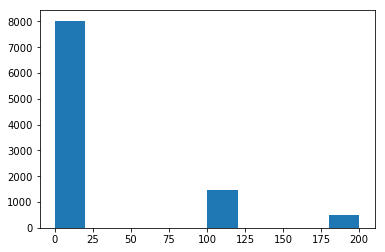

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(winnings);

This works okay, but let's make it prettier. Let's center each bin at 0, 100, and 200:

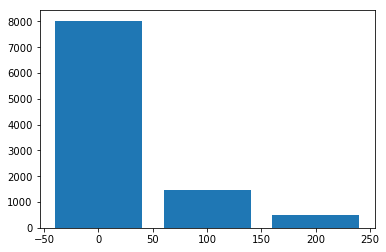

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(winnings, bins = 3, range=(-50,250), rwidth =.80);

Really, this raffle follows a discrete distribution, since there are only three winnings - 0, 100, and 200. Therefore, let's get rid of the x-axis tick marks and instead make three labels for 0, 100, and 200:


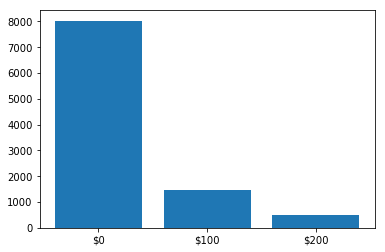

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(winnings, bins = 3, range=(-50,250), rwidth = 0.8);
plt.xticks([0,100,200], ['$0', '$100', '$200']);

### Head/Tails example

Suppose you wanted to simulate a heads/tails experiment 100 times. You could use random.choice to sample from the words "heads" and "tails":

In [21]:
options = ['heads', 'tails']
outcomes = []
for i in range(100):
    outcomes.append(rand.choice(options))
print(outcomes)

['heads', 'tails', 'heads', 'tails', 'tails', 'heads', 'heads', 'tails', 'tails', 'heads', 'tails', 'heads', 'tails', 'tails', 'heads', 'tails', 'tails', 'heads', 'tails', 'heads', 'tails', 'tails', 'tails', 'heads', 'tails', 'heads', 'heads', 'heads', 'heads', 'tails', 'tails', 'heads', 'tails', 'tails', 'tails', 'tails', 'heads', 'tails', 'heads', 'heads', 'tails', 'heads', 'heads', 'tails', 'tails', 'heads', 'heads', 'tails', 'heads', 'heads', 'heads', 'heads', 'tails', 'heads', 'heads', 'tails', 'heads', 'tails', 'heads', 'tails', 'tails', 'tails', 'tails', 'heads', 'heads', 'heads', 'tails', 'heads', 'tails', 'heads', 'tails', 'heads', 'tails', 'heads', 'tails', 'heads', 'heads', 'tails', 'heads', 'tails', 'tails', 'tails', 'tails', 'heads', 'tails', 'tails', 'heads', 'heads', 'tails', 'heads', 'tails', 'heads', 'heads', 'heads', 'heads', 'heads', 'tails', 'tails', 'heads', 'tails']


However, plt.hist only works with NUMBERS, not strings. Therefore, we should sample from the numbers 0 and 1 instead of the words "heads" and "tails". 

[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0]


(array([ 52.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  48.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

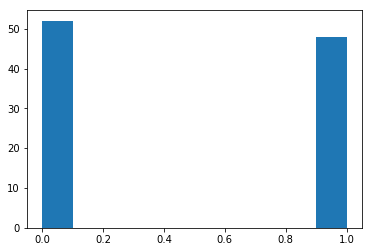

In [26]:
outcomes = []
for i in range(100):
    outcomes.append(rand.choice(range(0,2)))
print(outcomes)
plt.hist(outcomes)

Let's make it prettier. We should have them centered at 0 and 1 and have them not touching each other:


(array([ 52.,  48.]), array([-0.5,  0.5,  1.5]), <a list of 2 Patch objects>)

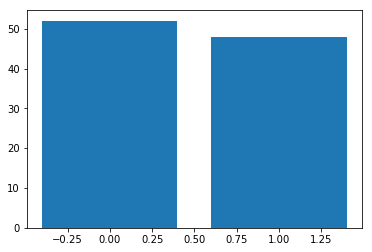

In [28]:
plt.hist(outcomes, bins = 2, range = (-.5, 1.5), rwidth = 0.8)

Furthermore, we should have the labels be "heads" and "tails". To this, we need to tell matplotlib WHERE to place the labels and WHAT their labels should be:

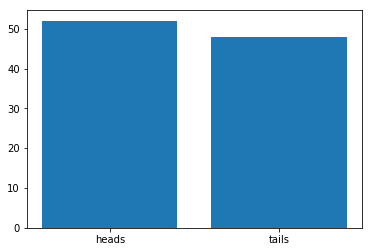

In [30]:
plt.hist(outcomes, bins = 2, range = (-.5, 1.5), rwidth = 0.8);
plt.xticks([0,1], ['heads', 'tails']);